# Final assessment: Data Visualisations with Python

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [53]:
mpl.style.use(['default']) # optional: for ggplot-like style 

In [54]:
url= 'https://cocl.us/datascience_survey_data'
df_survey = pd.read_csv(url,index_col=0)
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [55]:
df_survey.sort_values(by='Very interested',ascending=False,inplace=True)
df_survey_tot = df_survey.sum(axis=1)
print(df_survey_tot)

for columns in df_survey.columns:
    df_survey[columns] = df_survey[columns]/22.33 # divide by the total number of people *100
df_survey = df_survey.round(decimals=2)

df_survey

Data Analysis / Statistics    2192
Machine Learning              2180
Data Visualization            2176
Big Data (Spark / Hadoop)     2188
Deep Learning                 2169
Data Journalism               2120
dtype: int64


,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


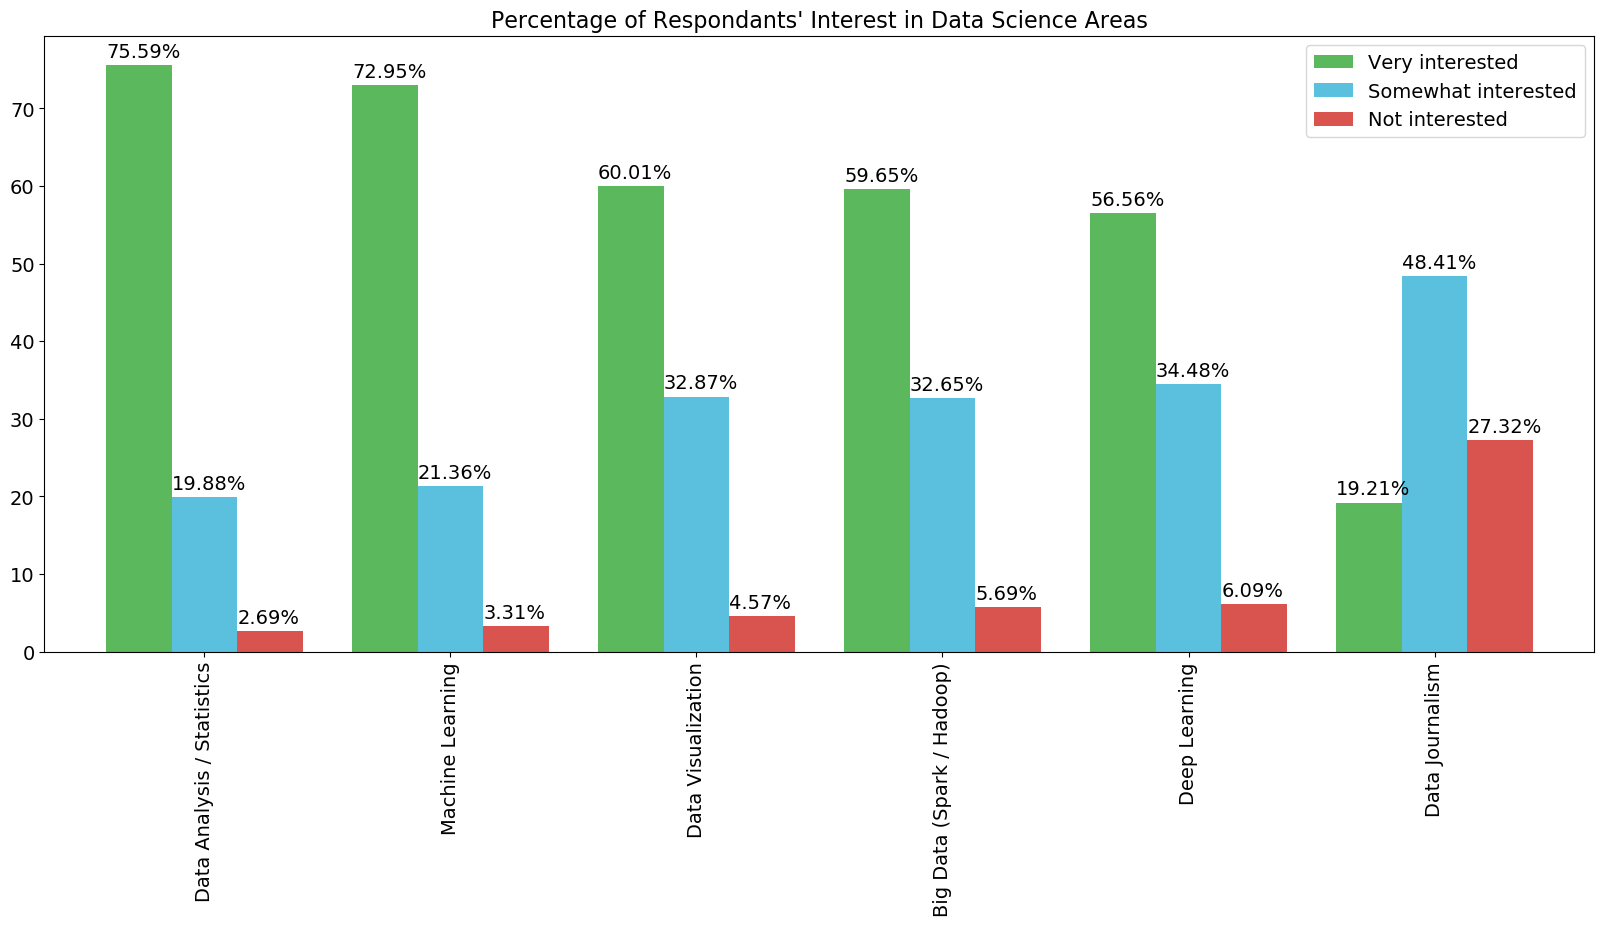

In [103]:
ax = df_survey.plot(kind='bar', 
              figsize=(20,8),
              fontsize=14,
              color=['#5cb85c','#5bc0de','#d9534f'],
              width=0.8
              )

for p in ax.patches:
    ax.annotate('{}%'.format(p.get_height()),
                xy = (p.get_x(),p.get_height() + 1),
               fontsize=14)

ax.legend(fontsize=14)
ax.set_title('Percentage of Respondants\' Interest in Data Science Areas',fontsize=16)
plt.show()

# autolabel(ax)
#5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,

## Part II: Let's now deal with the next part of the assignment

In [206]:
url = 'https://cocl.us/sanfran_crime_dataset'
df_crime = pd.read_csv(url,index_col=0)
df_crime.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [207]:
df_crime = pd.DataFrame(df_crime.groupby(['PdDistrict']).size())
df_crime.reset_index(inplace=True)
df_crime.columns = ['Neighbourhood','Number of crimes']

In [208]:
df_crime

,Neighbourhood,Number of crimes
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


### Cholorpleth map

In [210]:
import folium

In [285]:
san_geo = r'san_francisco_geo.json' # geojson file

# create a plain world map
san_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

In [286]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
san_map.choropleth(
    geo_data=san_geo,
    data=df_crime,
    columns=['Neighbourhood', 'Number of crimes'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
)

# display map
san_map